##### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2025 Semester 1

## Assignment 2


**Student ID(s):**     `1418850`


This iPython notebook is a template which you will use for your Assignment 1 submission.

**NOTE: YOU SHOULD ADD YOUR RESULTS, GRAPHS, AND FIGURES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).** Results, figures, etc. which appear in this file but are NOT included in your report will not be marked.

**Adding proper comments to your code is MANDATORY. **

## Load & merge training data


In [1]:
import pandas as pd
from functools import reduce

# Load the metadata (contains Id, filename, ClassId)
train_meta = pd.read_csv('train/train_metadata.csv')

# Load each feature set
train_colour = pd.read_csv('train/Features/color_histogram.csv')
train_hog = pd.read_csv('train/Features/hog_pca.csv')
train_add = pd.read_csv('train/Features/additional_features.csv')

# Merge them all on the common 'image_path' column
dataframes = [train_meta, train_colour, train_hog, train_add]
train_df = reduce(lambda left, right: pd.merge(left, right, on='image_path'), dataframes)

print(f"Merged training set shape: {train_df.shape}")
print(train_df.head())

C:\Users\mobassharz\AppData\Local\Temp\15\ipykernel_33684\1736251386.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Merged training set shape: (5488, 123)
     id      image_path  ClassId      ch_0      ch_1      ch_2      ch_3  \
0  7218  img_000001.jpg       32  0.000000  0.000000  0.268901  0.355617   
1  6333  img_000002.jpg       13  0.000000  0.002267  0.657901  0.641467   
2  6867  img_000003.jpg        7  0.002243  0.143541  0.385766  0.091956   
3  7730  img_000004.jpg        4  0.000000  0.096069  0.947646  0.217350   
4  6338  img_000005.jpg       35  0.000000  0.000000  0.000000  0.000000   

       ch_4      ch_5      ch_6  ...  hog_pca_14  hog_pca_15  hog_pca_16  \
0  0.511548  0.264923  0.526664  ...   -0.979620    0.450825   -0.213796   
1  0.222700  0.243100  0.108233  ...    0.101737   -0.335682   -0.886182   
2  0.066163  0.204097  0.353245  ...    0.377116    0.501386   -0.421448   
3  0.160404  0.083028  0.042601  ...   -0.595600    0.285638   -0.481589   
4  0.000000  0.015324  0.029918  ...    0.601939   -0.520063    0.062209   

   hog_pca_17  hog_pca_18  hog_pca_19  edge_den

## Load & merge test data

In [3]:
# Load test metadata  
test_meta  = pd.read_csv('test/test_metadata.csv')

# Load each test feature file  
test_color = pd.read_csv('test/Features/color_histogram.csv')
test_hog   = pd.read_csv('test/Features/hog_pca.csv')
test_add   = pd.read_csv('test/Features/additional_features.csv')

# Merge on 'image_path'  
test_dfs = [test_meta, test_color, test_hog, test_add]
test_df  = reduce(lambda left, right: pd.merge(left, right, on='image_path'), test_dfs)
  
print(f"Merged test set shape: {test_df.shape}")   # should be (2353, 123)
print(test_df.head())


Merged test set shape: (2353, 123)
     id      image_path  ClassId  ch_0      ch_1      ch_2      ch_3  \
0   661  img_005489.jpg      NaN   0.0  0.043099  0.018964  0.031606   
1  4477  img_005490.jpg      NaN   0.0  0.046065  0.411173  0.651735   
2  1046  img_005491.jpg      NaN   0.0  0.006825  0.040948  0.170616   
3   631  img_005492.jpg      NaN   0.0  0.000000  0.000000  0.021120   
4  6533  img_005493.jpg      NaN   0.0  0.000000  0.299374  0.917305   

       ch_4      ch_5      ch_6  ...  hog_pca_14  hog_pca_15  hog_pca_16  \
0  0.056316  0.049421  0.019538  ...    0.283365   -0.301160   -0.334299   
1  0.175730  0.132224  0.185966  ...   -0.229380    0.829642    0.137557   
2  0.316492  0.324170  0.271279  ...    0.337062    0.182572   -0.373714   
3  0.815159  0.551828  0.135710  ...    0.528455    0.411835   -0.654511   
4  0.168114  0.111571  0.102989  ...    0.120786   -0.020706    0.609833   

   hog_pca_17  hog_pca_18  hog_pca_19  edge_density      mean_b      mean_g

## Exploratory data analysis

Top 10 columns by missing values:
id       0
ch_89    0
ch_87    0
ch_86    0
ch_85    0
ch_84    0
ch_83    0
ch_82    0
ch_81    0
ch_80    0
dtype: int64


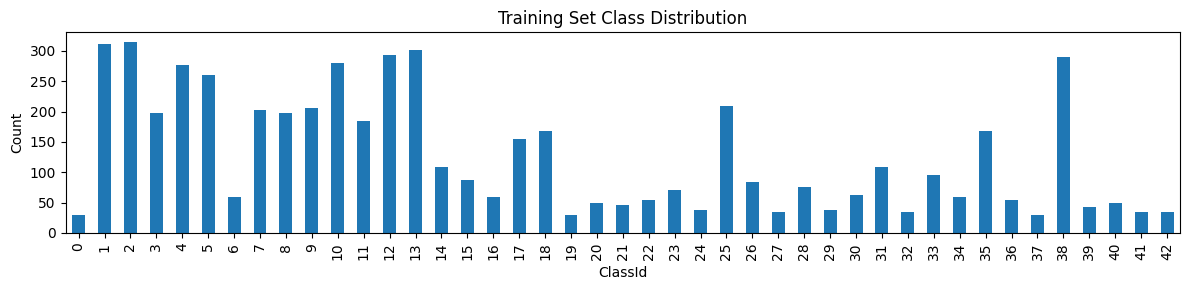

First 10 features summary:
          count         mean          std  min          25%          50%  \
id       5488.0  3909.515124  2263.069618  1.0  1954.750000  3917.500000   
ClassId  5488.0    15.795190    12.018043  0.0     5.000000    12.000000   
ch_0     5488.0     0.001594     0.017190  0.0     0.000000     0.000000   
ch_1     5488.0     0.091166     0.222423  0.0     0.000000     0.000681   
ch_2     5488.0     0.233191     0.300232  0.0     0.000701     0.060961   
ch_3     5488.0     0.261800     0.257555  0.0     0.030304     0.190260   
ch_4     5488.0     0.248081     0.222946  0.0     0.074960     0.186151   
ch_5     5488.0     0.219207     0.193436  0.0     0.072523     0.166587   
ch_6     5488.0     0.185793     0.169253  0.0     0.060665     0.138320   
ch_7     5488.0     0.155622     0.146814  0.0     0.049787     0.114759   

                 75%          max  
id       5867.500000  7840.000000  
ClassId    25.000000    42.000000  
ch_0        0.000000     0.6

In [2]:
import matplotlib.pyplot as plt

# 1. Missing‐value check
missing = train_df.isna().sum().sort_values(ascending=False)
print("Top 10 columns by missing values:")
print(missing.head(10))

# 2. Class‐balance bar chart
plt.figure(figsize=(12, 3))
train_df['ClassId']\
    .value_counts()\
    .sort_index()\
    .plot(kind='bar')
plt.xlabel('ClassId')
plt.ylabel('Count')
plt.title('Training Set Class Distribution')
plt.tight_layout()
plt.show()

# 3. Numeric feature summary
summary = train_df.describe().T
print("First 10 features summary:")
print(summary.head(10))


## Baseline pipelines + 5-fold CV

In [4]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

# 1. Prepare X, y
X = train_df.drop(['id','image_path','ClassId'], axis=1)
y = train_df['ClassId']

# 2. Define 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro']

# 3. Pipelines
pipelines = {
    'kNN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]),
    'RandomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(n_estimators=100, 
                                      class_weight='balanced',
                                      random_state=42, n_jobs=-1))
    ])
}

# 4. Cross‐validate each
results = {}
for name, pipe in pipelines.items():
    cv_res = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    results[name] = {
        metric: (np.mean(cv_res[f'test_{metric}']), 
                 np.std(cv_res[f'test_{metric}']))
        for metric in scoring
    }

# 5. Print a summary
for name, metrics in results.items():
    print(f"\n=== {name} ===")
    for metric, (mean, std) in metrics.items():
        print(f"{metric:15s}: {mean:.3f} ± {std:.3f}")



=== kNN ===
accuracy       : 0.616 ± 0.011
precision_macro: 0.669 ± 0.027
recall_macro   : 0.563 ± 0.018

=== RandomForest ===
accuracy       : 0.792 ± 0.008
precision_macro: 0.863 ± 0.011
recall_macro   : 0.735 ± 0.010


# hyperparameter tuning

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 1. Rebuild your RF pipeline
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# 2. Define search space (distributions for RandomizedSearch)
param_dist = {
    'rf__n_estimators':       randint(100, 501),       # 100–500 trees
    'rf__max_depth':          [None, 10, 20, 30, 40],   # None or shallow depths
    'rf__max_features':       ['sqrt', 'log2', None],   
    'rf__min_samples_split':  randint(2, 11),           # 2–10 samples to split
    'rf__min_samples_leaf':   randint(1, 5)             # 1–4 samples per leaf
}

# 3. Stratified CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. RandomizedSearchCV
rs = RandomizedSearchCV(
    rf_pipe,
    param_distributions=param_dist,
    n_iter=50,                   # try 50 random combinations
    scoring='accuracy',          # or 'precision_macro' / 'recall_macro'
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 5. Fit on the full training set
rs.fit(X, y)

# 6. Results
print("Best accuracy: ", rs.best_score_)
print("Best parameters:", rs.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best accuracy:  0.8119554406536789
Best parameters: {'rf__max_depth': 30, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 4, 'rf__n_estimators': 463}


# re-evaluate tuned model performance

In [9]:
# 1. Rebuild the tuned pipeline with the best params
best_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
        n_estimators=463,
        max_depth=30,
        max_features='sqrt',
        min_samples_split=4,
        min_samples_leaf=1,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

# 2. Fit on all of the training data
best_rf.fit(X, y)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro']

cv_res = cross_validate(best_rf, X, y, cv=cv, scoring=scoring, n_jobs=-1)
for metric in scoring:
    mean = cv_res[f'test_{metric}'].mean()
    std = cv_res[f'test_{metric}'].std()
    print(f"{metric:15s}: {mean:.3f} ± {std:.3f}")

accuracy       : 0.812 ± 0.008
precision_macro: 0.880 ± 0.003
recall_macro   : 0.769 ± 0.013


# generate test-set predictions

In [13]:
# X_test features only
X_test = test_df.drop(['id','image_path', 'ClassId'], axis=1)

# Reorder to match training set columns
X_test = X_test[X.columns]

# Predict
test_preds = best_rf.predict(X_test)

# Build submission DataFrame
submission = pd.DataFrame({
    'id':      test_df['id'],
    'ClassId': test_preds
})

submission.to_csv('submission.csv', index=False)
print("Wrote submission.csv with", len(submission), "rows.")
# Submission file should have 2353 rows, matching the test set size

Wrote submission.csv with 2353 rows.


# confusion matrix

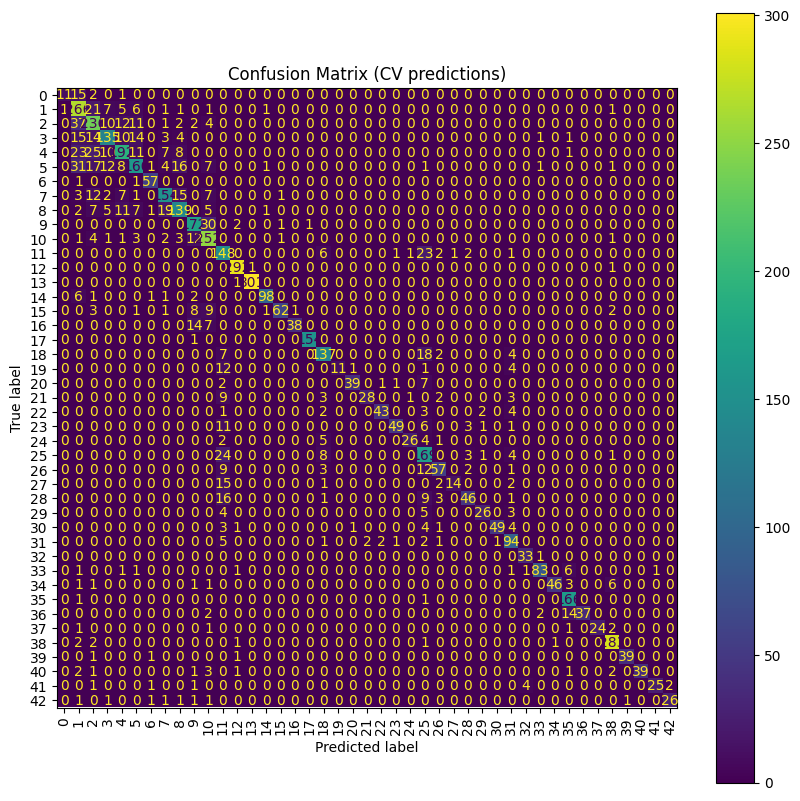

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Run CV predictions
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(best_rf, X, y, cv=cv, n_jobs=-1)

cm = confusion_matrix(y, y_pred, labels=best_rf.named_steps['rf'].classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=best_rf.named_steps['rf'].classes_)
plt.figure(figsize=(10,10))
disp.plot(ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix (CV predictions)')
plt.show()


# cnn

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# parameters
TRAIN_CSV = 'train/train_metadata.csv'
TEST_CSV = 'test/test_metadata.csv'
TRAIN_IMG_DIR = 'train'
TEST_IMG_DIR = 'test'
TARGET_SIZE = (64, 64)  # Resize images to 64x64
BATCH_SIZE = 32
NUM_CLASSES = 43
EPOCHS = 30

# load metadata & build filepath columns
train_df = pd.read_csv(TRAIN_CSV)
train_df['filepath'] = train_df['image_path'].apply(lambda x: os.path.join(TRAIN_IMG_DIR, x))
train_df['ClassId'] = train_df['ClassId'].astype(str)  # Convert to string for categorical labels

test_df = pd.read_csv(TEST_CSV)
test_df['filepath'] = test_df['image_path'].apply(lambda x: os.path.join(TEST_IMG_DIR, x))

# Data generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)

train_loader = train_gen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='ClassId',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_loader = train_gen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='ClassId',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

# build simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*TARGET_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_cnn.h5', save_best_only=True)
]

# train the model
history = model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=EPOCHS,
    callbacks=callbacks
)

# prepare test loader & predict
test_gen = ImageDataGenerator(rescale=1./255)
test_loader = test_gen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col=None,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=False
)

preds = model.predict(test_loader, verbose = 1)
pred_labels = np.argmax(preds, axis=1)

# write submission
submission_cnn = pd.DataFrame({
    'id':      test_df['id'],
    'ClassId': pred_labels
})
submission_cnn.to_csv('submission_cnn.csv', index=False)
print("Wrote submission_cnn.csv with", len(submission_cnn), "rows.")

Found 4391 validated image filenames belonging to 43 classes.
Found 1097 validated image filenames belonging to 43 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       73856  

35/35 [==============================] - 4s 97ms/step
Validation accuracy: 0.8842297174111212


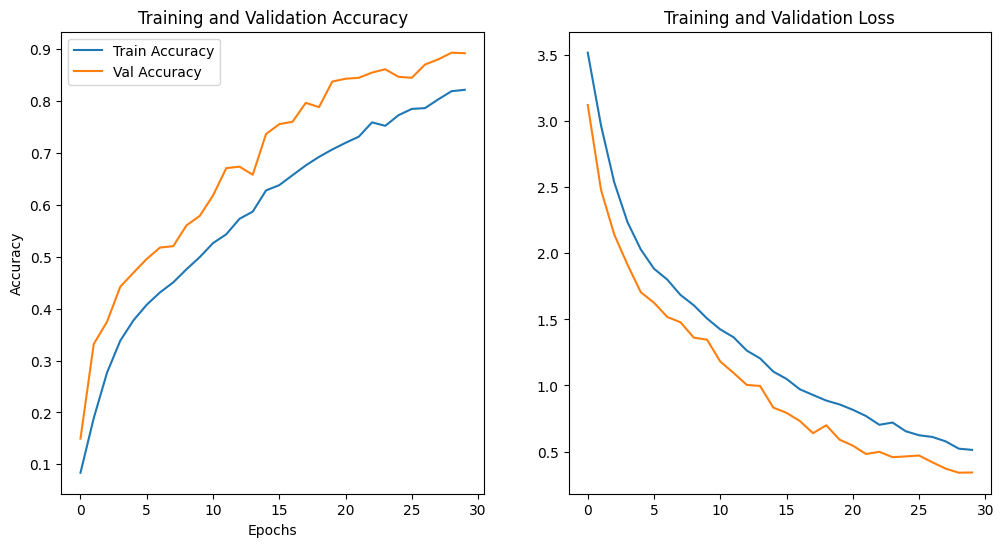

In [17]:
history.history['accuracy'][-1], history.history['val_accuracy'][-1]
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')


val_preds = model.predict(val_loader, verbose=1)
val_pred_idx = np.argmax(val_preds, axis=1)
true_idx     = val_loader.classes   # the integer labels

from sklearn.metrics import accuracy_score
print("Validation accuracy:", accuracy_score(true_idx, val_pred_idx))


In [8]:
# logistic regression
# knn
# ddecision tree
# Random Forest